In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/regression-analysis/real-estate-house-pricing/real_estate_data.csv')
df = df.iloc[:,1:] #retrieve house pricing data
df.head()

,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long,house_p
0,32.0,84.87882,10,84.87882,24.98298,121.54024,3221.5
1,19.5,306.59470,9,306.59470,24.98034,121.53951,3587.0
2,13.3,561.98450,5,561.98450,24.98746,121.54391,4020.5
3,13.3,561.98450,5,561.98450,24.98746,121.54391,4658.0
4,5.0,390.56840,5,390.56840,24.97937,121.54245,3663.5


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_age        414 non-null    float64
 1   dist_nStation    414 non-null    float64
 2   num_cStores      414 non-null    int64  
 3   dist_nStation.1  414 non-null    float64
 4   lat              414 non-null    float64
 5   long             414 non-null    float64
 6   house_p          414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [8]:
X = df.iloc[:,0:6]#get features
y = df.iloc[:,[6]]#get target variable
X.head()

,house_age,dist_nStation,num_cStores,dist_nStation.1,lat,long
0,32.0,84.87882,10,84.87882,24.98298,121.54024
1,19.5,306.59470,9,306.59470,24.98034,121.53951
2,13.3,561.98450,5,561.98450,24.98746,121.54391
3,13.3,561.98450,5,561.98450,24.98746,121.54391
4,5.0,390.56840,5,390.56840,24.97937,121.54245


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)

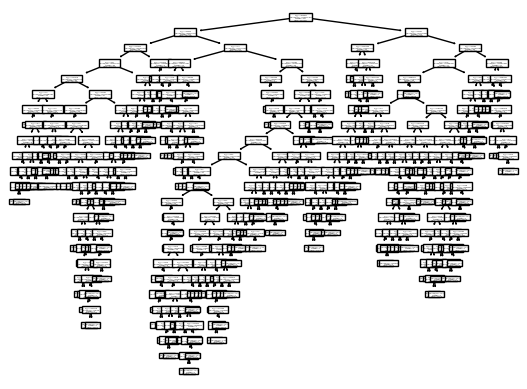

In [11]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

dt_regressor = DecisionTreeRegressor(criterion="squared_error",max_depth=None,min_samples_leaf=1)#Setting the decision tree - settings
dt_regressor.fit(X_train,y_train)#train the classifier

tree.plot_tree(dt_regressor)
plt.show()


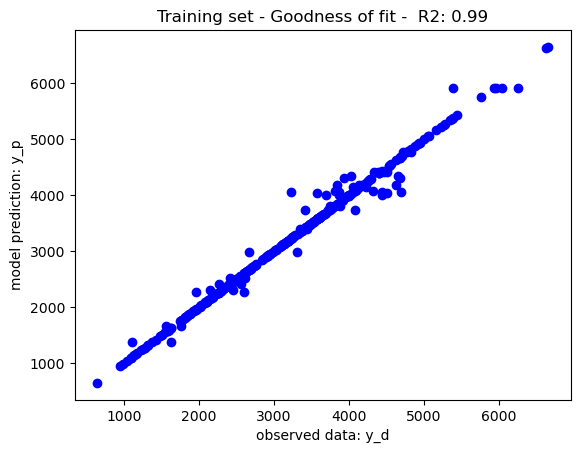

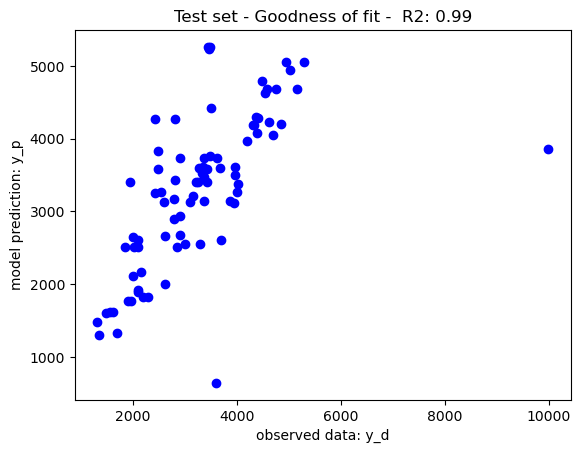

In [12]:
from sklearn.metrics import r2_score

y_pred_train = dt_regressor.predict(X_train)
y_pred_test = dt_regressor.predict(X_test)

r2_score_train = r2_score(y_pred_train,y_train)
r2_score_test = r2_score(y_pred_test,y_test)

plt.figure()
plt.scatter(y_train, y_pred_train, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Training set - Goodness of fit -  R2: %.2f'%r2_score_train)
plt.show() 

plt.figure()
plt.scatter(y_test, y_pred_test, color="b")
plt.xlabel('observed data: y_d')
plt.ylabel('model prediction: y_p')
plt.title('Test set - Goodness of fit -  R2: %.2f'%r2_score_train)
plt.show() 